# SAR Constant False Alarm Rate (CFAR) object detector in Julia 

## Object detection
 <a class="anchor" id="Introduction"></a>

This notebook illustrates how objects can be detected in Sentinel-1 SLC images using a CFAR approch. Two variants of the CFAR are implemented, the CP-CFAR and the CA-CFAR. 


Object detection are used in many fiels of earth observation in both the land and maritime enviroment. For the maritime enviroment, it is used in great extent for, e.g., iceberg detection or ship detection. 

Often, object detection is used as a priliminary result whereafter the detected objects are classifies as belonging to different classes.

## Table Of Contents
-  [Include modules](#Include)
-  [Load and show Image](#show_image)
-  [CFAR](#CFAR)
-  [CA-CFAR](#ca_cfar)
-  [CP-CFAR](#cp_cfar)


## Include modules
 <a class="anchor" id="Include"></a>

The package is not relased yet. The code has to be cloned from github and instasiated to use before use. ThE package also contains 2 modules which are not included in the main script since they will be seperated to their own packages before release. 

In [1]:
include("../src/object_detector.jl")
include("../src/separateLater/Sentinel1/Sentinel1.jl");
include("../src/separateLater/VisualiseSAR/VisualiseSAR.jl");

using SARProcessing;
using .object_detector;

## Load and Show image
 <a class="anchor" id="show_image"></a>

In [2]:
slcSubsetPath = "../test/testData/s1a-iw3-slc-vv_subset_hight9800_10400_width11000_11000.tiff";
complex_image = Sentinel1.readTiff(slcSubsetPath);

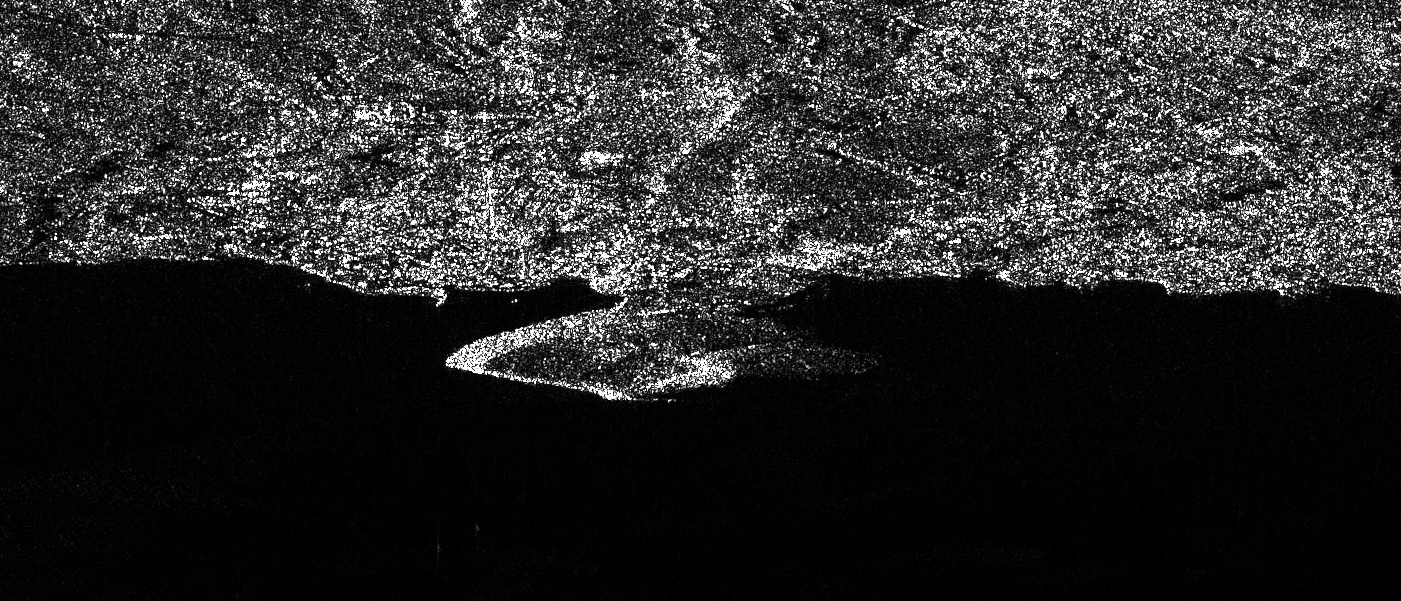

In [3]:
image = abs2.(complex_image);
VisualiseSAR.sar2grayimage(image, p_quantile = 0.95)

In [37]:
object_detector.cfar.meanFilter([3,3])

3×3 Matrix{Float64}:
 0.111111  0.111111  0.111111
 0.111111  0.111111  0.111111
 0.111111  0.111111  0.111111

In [24]:
typeof(complex_image)

Matrix{ComplexF64} (alias for Array{Complex{Float64}, 2})

In [31]:
typeof(object_detector.cfar._cfar_pixel_test(image,  80, 0.0001))

Int64

In [33]:
typeof(image_cp_cfar)

Matrix{Float64} (alias for Array{Float64, 2})

## CFAR
 <a class="anchor" id="CFAR"></a>

insert Image.

In [19]:
background_window = 31
guard_window = 21
probability_for_alarms = 0.000000000001

1.0e-12

### CA-CFAR
 <a class="anchor" id="ca_cfar"></a>

In [20]:
image_ca_cfar = object_detector.cfar.ca_cfar(image,background_window,guard_window,probability_for_alarms);

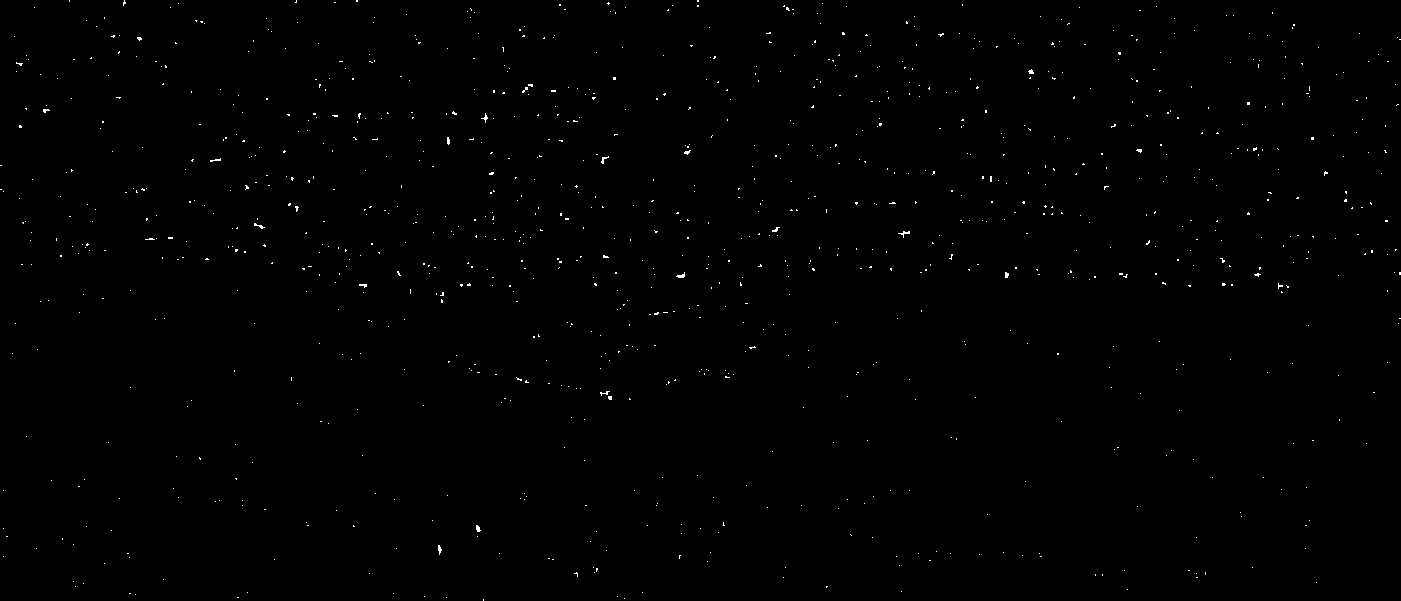

In [21]:
VisualiseSAR.sar2grayimage(image_ca_cfar, p_quantile = 0.95)

### CP-CFAR
<a class="anchor" id="cp_cfar"></a>

In [22]:
image_cp_cfar = object_detector.cfar.cp_cfar(image,background_window,guard_window,probability_for_alarms);

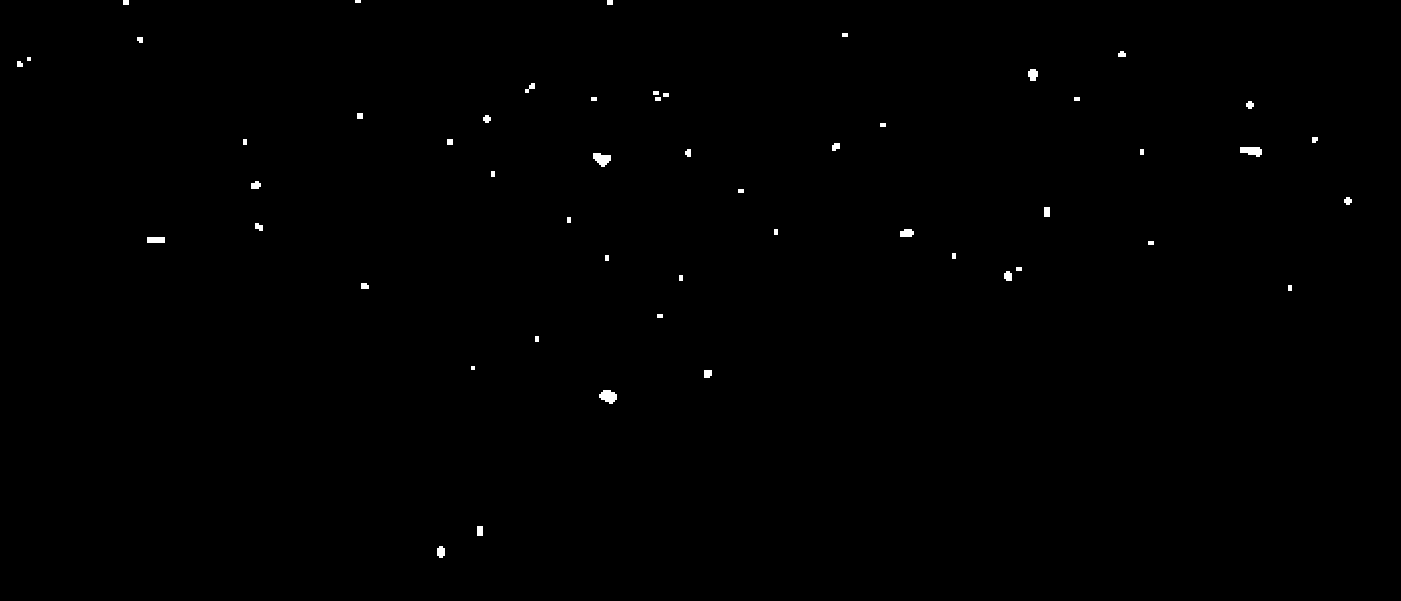

In [23]:
VisualiseSAR.sar2grayimage(image_cp_cfar, p_quantile = 0.95)